1. Import the Iris dataset form the link: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay

In [89]:
# open a csv file from the https link
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Create a pairplot to visualize the similarities and especially difference between the species using seaborn

<Figure size 1000x500 with 0 Axes>

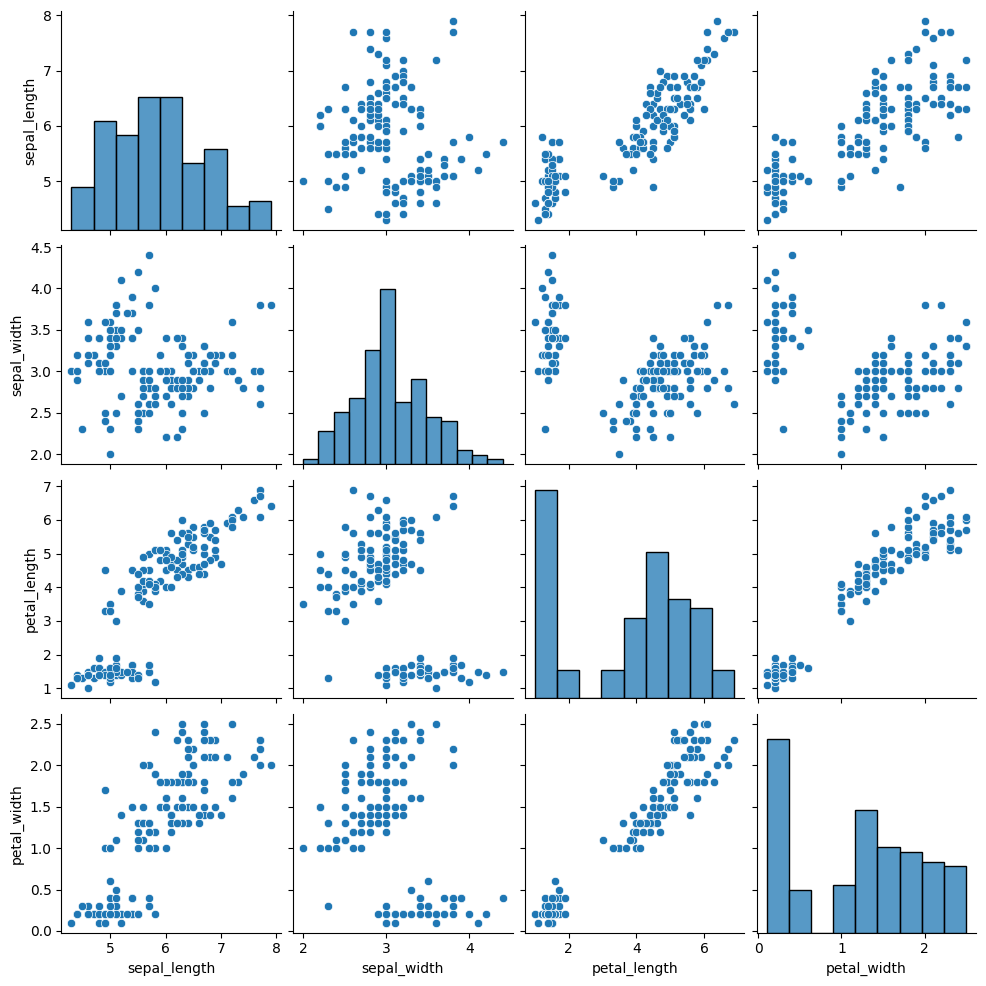

In [90]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df)
plt.show()

3. Provide code to Check the dataset (eg: head, info, describe)

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


4. Separate the independent variables from dependent variables (ie: X, y)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [95]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [96]:
df.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

5. Split the dataset into train and test using sklearn train_test_split package

In [97]:
y = df.pop(item="species")
X = df

print(X.head())
print(y)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Run the following code to train an SVM classifier where x_train and y_train are obtained from (5)

In [99]:
model=SVC()

In [100]:
model.fit(X_train, y_train)

SVC()

7. Run the following to perform prediction

In [101]:
y_pred=model.predict(X_test)

In [102]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [103]:
# print(type(y_test))
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

8. Provide code to find the Accuracy, Precision, Recall, F1-score

In [104]:
print("Accuracy Score: ", accuracy_score(y_true=y_test, y_pred=y_pred))
print("Recall Score: ", recall_score(y_true=y_test, y_pred=y_pred, average=None))
print("F1-Score: ", f1_score(y_true=y_test, y_pred=y_pred, average=None))

Accuracy Score:  1.0
Recall Score:  [1. 1. 1.]
F1-Score:  [1. 1. 1.]


9. Provide code to show the report and confusion matrix

In [105]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [109]:
target_names = ["setosa", "versicolor", "virginica"]

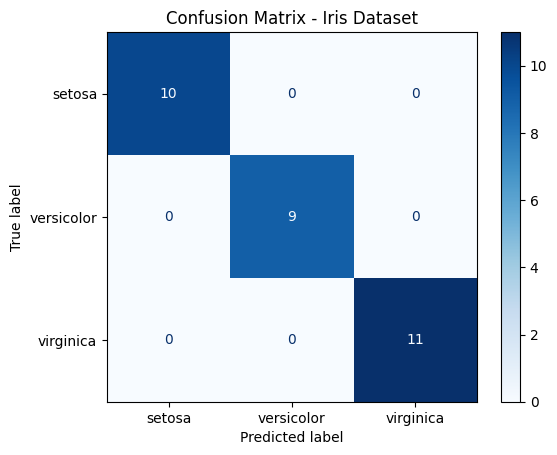

In [110]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Iris Dataset")
plt.show()

# Try with other SVC kernels like linear, rbf, poly

In [120]:
model=SVC(kernel="poly")
model.fit(X_train, y_train)


SVC(kernel='poly')

In [118]:
y_pred = model.predict(X_test)

In [119]:
accuracy_score(y_test, y_pred)

1.0